## Modeling: Stacked LSTM
Company: Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011 The VWAP (Volume Weighted Average Price) 
is the target variable to predict. VWAP is a trading benchmark used by traders that gives the average price the 
stock has traded at throughout the day, based on both volume and price. 
Reference: https://www.kaggle.com/sinjoysaha/stock-price-forecasting-using-stacked-lstm          

In [3]:
!ls

02-data_wrangling.ipynb        04-modeling.ipynb
03-pre-processing.ipynb        Capstone3-Colab.ipynb
04-Modeling-Stacked_LSTM.ipynb stock_market.csv
04-Modeling_LSTM.ipynb


In [4]:
# Read the data
import pandas as pd
stock_market_data = pd.read_csv('stock_market.csv')
df = stock_market_data.drop(['Time.1'], axis = 1)
df.head(3)

,Time,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2000-01-03,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,443175.0,0.44345
1,2000-01-04,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,443175.0,0.44345
2,2000-01-05,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,443175.0,0.44345


In [3]:
# Install Tensorflow for Keras
!conda install -c anaconda tensorflow -y

Solving environment: done

# All requested packages already installed.



In [5]:
# Set the path
import sys
sys.path.append('/Users/elinorvelasquez/anaconda3/lib/python3.8/site-packages/')

In [6]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [7]:
df_VWAP = df.reset_index()['VWAP']
df_VWAP.tail()

5301    421.33
5302    420.45
5303    419.33
5304    420.00
5305    428.14
Name: VWAP, dtype: float64

In [10]:
df_VWAP.shape

(5306,)

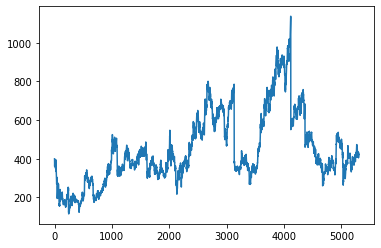

In [11]:
plt.plot(df_VWAP)
plt.show()

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
df_VWAP = scaler.fit_transform(np.array(df_VWAP).reshape(-1,1))

# Standardize the data for the neural network

In [8]:
df_VWAP.shape

(5306, 1)

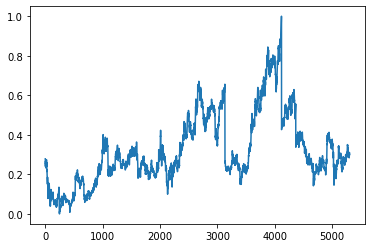

In [9]:
plt.plot(df_VWAP)
plt.show()

In [10]:
# train_test_split the data into training and test subsets
train_size = int(len(df_VWAP)*0.65)
test_size = len(df_VWAP) - train_size
train_data = df_VWAP[0:train_size,:]
test_data = df_VWAP[train_size:,:]

In [11]:
train_size, test_size
test_data.shape

(1858, 1)

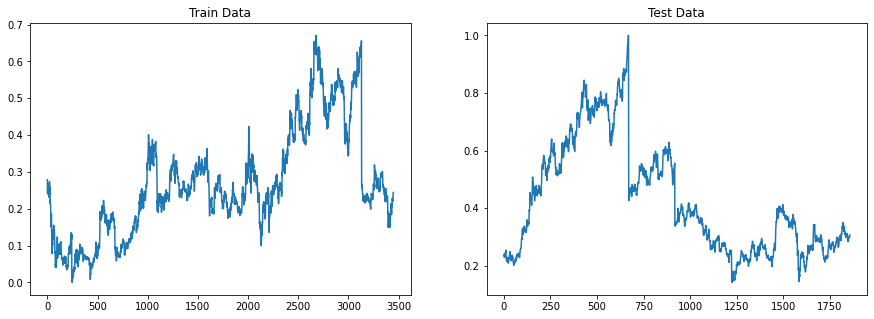

In [12]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(train_data)
plt.title('Train Data')
plt.subplot(122)
plt.plot(test_data)
plt.title('Test Data')
plt.show()

### Model

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step),0])
        dataY.append(dataset[(i+time_step),0])
    
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [15]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((3347, 100), (3347,), (1757, 100), (1757,))

In [16]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],1)

In [17]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((3347, 100, 1), (3347,), (1757, 100, 1), (1757,))

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_history = model.fit(train_x, train_y, 
                          validation_data=(test_x, test_y), 
                          epochs=100, batch_size=64)

Epoch 1/100
53/53 [==============================] - 10s 128ms/step - loss: 0.0190 - val_loss: 0.0028
Epoch 2/100
53/53 [==============================] - 5s 104ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 3/100
53/53 [==============================] - 5s 104ms/step - loss: 9.4897e-04 - val_loss: 0.0020
Epoch 4/100
53/53 [==============================] - 5s 103ms/step - loss: 8.9607e-04 - val_loss: 0.0018
Epoch 5/100
53/53 [==============================] - 5s 104ms/step - loss: 7.7909e-04 - val_loss: 0.0024
Epoch 6/100
53/53 [==============================] - 5s 103ms/step - loss: 8.1418e-04 - val_loss: 0.0014
Epoch 7/100
53/53 [==============================] - 5s 103ms/step - loss: 5.9344e-04 - val_loss: 0.0014
Epoch 8/100
53/53 [==============================] - 5s 104ms/step - loss: 5.9649e-04 - val_loss: 0.0012
Epoch 9/100
53/53 [==============================] - 5s 103ms/step - loss: 5.1899e-04 - val_loss: 0.0012
Epoch 10/100
53/53 [==============================] - 5s 104ms

53/53 [==============================] - 5s 103ms/step - loss: 1.0254e-04 - val_loss: 5.0879e-04
Epoch 77/100
53/53 [==============================] - 5s 104ms/step - loss: 1.4964e-04 - val_loss: 3.8418e-04
Epoch 78/100
53/53 [==============================] - 5s 103ms/step - loss: 1.1970e-04 - val_loss: 3.8516e-04
Epoch 79/100
53/53 [==============================] - 5s 103ms/step - loss: 1.6523e-04 - val_loss: 3.7008e-04
Epoch 80/100
53/53 [==============================] - 5s 102ms/step - loss: 1.1487e-04 - val_loss: 3.6383e-04
Epoch 81/100
53/53 [==============================] - 5s 102ms/step - loss: 1.1670e-04 - val_loss: 3.9350e-04
Epoch 82/100
53/53 [==============================] - 6s 105ms/step - loss: 1.3954e-04 - val_loss: 3.8288e-04
Epoch 83/100
53/53 [==============================] - 5s 104ms/step - loss: 2.4239e-04 - val_loss: 3.6276e-04
Epoch 84/100
53/53 [==============================] - 5s 103ms/step - loss: 1.0866e-04 - val_loss: 3.4590e-04
Epoch 85/100
53/53 [===

In [22]:
model_history.history.keys()

dict_keys(['loss', 'val_loss'])

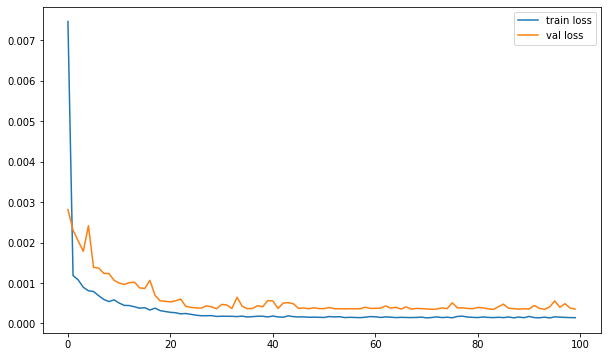

In [23]:
plt.figure(figsize=[10,6])
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

### Forecasting

In [24]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)
test_predict.shape

(1757, 1)

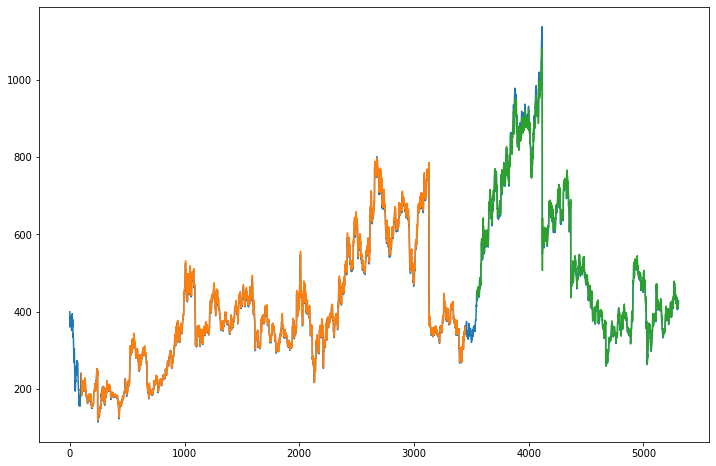

In [25]:
trainPredictPlot = np.empty_like(df_VWAP)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step,:] = train_predict

testPredictPlot = np.empty_like(df_VWAP)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (time_step*2) +1:len(df_VWAP)-1, :] = test_predict

plt.figure(figsize=[12,8])
plt.plot(scaler.inverse_transform(df_VWAP))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

### Predict next 30 days

In [26]:
x_input = test_data[0:100].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.23867202393172415,
 0.23911194533243396,
 0.22944345054794651,
 0.22879823249357228,
 0.23286506144235564,
 0.2374695721031176,
 0.24103782346442992,
 0.2381538942819994,
 0.24390220058460665,
 0.249562522607072,
 0.2541474812055802,
 0.2411453598068256,
 0.23352983155898366,
 0.22242426019884443,
 0.22024420525754956,
 0.2158352152193253,
 0.22485849194943835,
 0.2296291951393573,
 0.22908173739625187,
 0.22086987124967006,
 0.2145936592662111,
 0.21225718782688602,
 0.22713630720200217,
 0.21329344712633563,
 0.20951012308023187,
 0.21562014253453382,
 0.2201757730396614,
 0.22387111280562316,
 0.22856360774652706,
 0.23052859000303055,
 0.23996246004047272,
 0.2424846760712086,
 0.24905416898847405,
 0.2404708136590707,
 0.23018642891358965,
 0.23153552120909954,
 0.2229912700042037,
 0.2173505000439921,
 0.22144665708615613,
 0.22539617366141695,
 0.21920794595809995,
 0.2200975647906463,
 0.22970740338837242,
 0.23155507327135333,
 0.236853682142124,
 0.23509399653928498,
 0.22

In [28]:
output = []
days = 1758
for i in range(days):
    print('start')
    x_input = np.array(temp_input[i:])
    print(f'{i} day input {x_input}')    
    x_input = x_input.reshape((1, time_step, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat)
    temp_input.extend(yhat[0].tolist())
    output.extend(yhat[0].tolist())    

start
0 day input [0.23867202 0.23911195 0.22944345 0.22879823 0.23286506 0.23746957
 0.24103782 0.23815389 0.2439022  0.24956252 0.25414748 0.24114536
 0.23352983 0.22242426 0.22024421 0.21583522 0.22485849 0.2296292
 0.22908174 0.22086987 0.21459366 0.21225719 0.22713631 0.21329345
 0.20951012 0.21562014 0.22017577 0.22387111 0.22856361 0.23052859
 0.23996246 0.24248468 0.24905417 0.24047081 0.23018643 0.23153552
 0.22299127 0.2173505  0.22144666 0.22539617 0.21920795 0.22009756
 0.2297074  0.23155507 0.23685368 0.235094   0.22974651 0.23024509
 0.23030374 0.22688213 0.21246248 0.21266778 0.20656754 0.20153288
 0.20491539 0.20886491 0.21144578 0.21155331 0.20929505 0.21063437
 0.22022465 0.21969675 0.21909063 0.22219941 0.22714608 0.22484872
 0.21653909 0.220166   0.2336667  0.23003001 0.23943455 0.2379877
 0.23534817 0.23452699 0.23188746 0.23226872 0.23490825 0.23881866
 0.24421503 0.23699055 0.23433147 0.23578809 0.23641376 0.23194611
 0.22841697 0.23766509 0.24408795 0.25032505 0

[[0.37167996]]
start
10 day input [0.25414748 0.24114536 0.23352983 0.22242426 0.22024421 0.21583522
 0.22485849 0.2296292  0.22908174 0.22086987 0.21459366 0.21225719
 0.22713631 0.21329345 0.20951012 0.21562014 0.22017577 0.22387111
 0.22856361 0.23052859 0.23996246 0.24248468 0.24905417 0.24047081
 0.23018643 0.23153552 0.22299127 0.2173505  0.22144666 0.22539617
 0.21920795 0.22009756 0.2297074  0.23155507 0.23685368 0.235094
 0.22974651 0.23024509 0.23030374 0.22688213 0.21246248 0.21266778
 0.20656754 0.20153288 0.20491539 0.20886491 0.21144578 0.21155331
 0.20929505 0.21063437 0.22022465 0.21969675 0.21909063 0.22219941
 0.22714608 0.22484872 0.21653909 0.220166   0.2336667  0.23003001
 0.23943455 0.2379877  0.23534817 0.23452699 0.23188746 0.23226872
 0.23490825 0.23881866 0.24421503 0.23699055 0.23433147 0.23578809
 0.23641376 0.23194611 0.22841697 0.23766509 0.24408795 0.25032505
 0.25637642 0.25861513 0.25735402 0.25933855 0.26341516 0.27460871
 0.29097379 0.2963115  0.29594

[[0.42817914]]
start
20 day input [0.21459366 0.21225719 0.22713631 0.21329345 0.20951012 0.21562014
 0.22017577 0.22387111 0.22856361 0.23052859 0.23996246 0.24248468
 0.24905417 0.24047081 0.23018643 0.23153552 0.22299127 0.2173505
 0.22144666 0.22539617 0.21920795 0.22009756 0.2297074  0.23155507
 0.23685368 0.235094   0.22974651 0.23024509 0.23030374 0.22688213
 0.21246248 0.21266778 0.20656754 0.20153288 0.20491539 0.20886491
 0.21144578 0.21155331 0.20929505 0.21063437 0.22022465 0.21969675
 0.21909063 0.22219941 0.22714608 0.22484872 0.21653909 0.220166
 0.2336667  0.23003001 0.23943455 0.2379877  0.23534817 0.23452699
 0.23188746 0.23226872 0.23490825 0.23881866 0.24421503 0.23699055
 0.23433147 0.23578809 0.23641376 0.23194611 0.22841697 0.23766509
 0.24408795 0.25032505 0.25637642 0.25861513 0.25735402 0.25933855
 0.26341516 0.27460871 0.29097379 0.2963115  0.29594979 0.2917461
 0.32413409 0.32480863 0.33015352 0.33441782 0.33865845 0.34297019
 0.34745324 0.35209411 0.3568576

[[0.4926678]]
start
30 day input [0.23996246 0.24248468 0.24905417 0.24047081 0.23018643 0.23153552
 0.22299127 0.2173505  0.22144666 0.22539617 0.21920795 0.22009756
 0.2297074  0.23155507 0.23685368 0.235094   0.22974651 0.23024509
 0.23030374 0.22688213 0.21246248 0.21266778 0.20656754 0.20153288
 0.20491539 0.20886491 0.21144578 0.21155331 0.20929505 0.21063437
 0.22022465 0.21969675 0.21909063 0.22219941 0.22714608 0.22484872
 0.21653909 0.220166   0.2336667  0.23003001 0.23943455 0.2379877
 0.23534817 0.23452699 0.23188746 0.23226872 0.23490825 0.23881866
 0.24421503 0.23699055 0.23433147 0.23578809 0.23641376 0.23194611
 0.22841697 0.23766509 0.24408795 0.25032505 0.25637642 0.25861513
 0.25735402 0.25933855 0.26341516 0.27460871 0.29097379 0.2963115
 0.29594979 0.2917461  0.32413409 0.32480863 0.33015352 0.33441782
 0.33865845 0.34297019 0.34745324 0.35209411 0.35685766 0.36171573
 0.36665589 0.37167996 0.37679785 0.38202214 0.38736367 0.39282942
 0.39842272 0.40414256 0.409985

[[0.55218124]]
start
40 day input [0.21920795 0.22009756 0.2297074  0.23155507 0.23685368 0.235094
 0.22974651 0.23024509 0.23030374 0.22688213 0.21246248 0.21266778
 0.20656754 0.20153288 0.20491539 0.20886491 0.21144578 0.21155331
 0.20929505 0.21063437 0.22022465 0.21969675 0.21909063 0.22219941
 0.22714608 0.22484872 0.21653909 0.220166   0.2336667  0.23003001
 0.23943455 0.2379877  0.23534817 0.23452699 0.23188746 0.23226872
 0.23490825 0.23881866 0.24421503 0.23699055 0.23433147 0.23578809
 0.23641376 0.23194611 0.22841697 0.23766509 0.24408795 0.25032505
 0.25637642 0.25861513 0.25735402 0.25933855 0.26341516 0.27460871
 0.29097379 0.2963115  0.29594979 0.2917461  0.32413409 0.32480863
 0.33015352 0.33441782 0.33865845 0.34297019 0.34745324 0.35209411
 0.35685766 0.36171573 0.36665589 0.37167996 0.37679785 0.38202214
 0.38736367 0.39282942 0.39842272 0.40414256 0.40998507 0.4159441
 0.42201185 0.42817914 0.43443578 0.44077063 0.44717145 0.45362562
 0.46011949 0.46663874 0.473168

[[0.5960499]]
start
50 day input [0.21246248 0.21266778 0.20656754 0.20153288 0.20491539 0.20886491
 0.21144578 0.21155331 0.20929505 0.21063437 0.22022465 0.21969675
 0.21909063 0.22219941 0.22714608 0.22484872 0.21653909 0.220166
 0.2336667  0.23003001 0.23943455 0.2379877  0.23534817 0.23452699
 0.23188746 0.23226872 0.23490825 0.23881866 0.24421503 0.23699055
 0.23433147 0.23578809 0.23641376 0.23194611 0.22841697 0.23766509
 0.24408795 0.25032505 0.25637642 0.25861513 0.25735402 0.25933855
 0.26341516 0.27460871 0.29097379 0.2963115  0.29594979 0.2917461
 0.32413409 0.32480863 0.33015352 0.33441782 0.33865845 0.34297019
 0.34745324 0.35209411 0.35685766 0.36171573 0.36665589 0.37167996
 0.37679785 0.38202214 0.38736367 0.39282942 0.39842272 0.40414256
 0.40998507 0.4159441  0.42201185 0.42817914 0.43443578 0.44077063
 0.44717145 0.45362562 0.46011949 0.46663874 0.47316855 0.47969371
 0.48619872 0.49266779 0.49908513 0.50543547 0.51170355 0.5178749
 0.52393585 0.52987361 0.5356766 

[[0.6240964]]
start
60 day input [0.22022465 0.21969675 0.21909063 0.22219941 0.22714608 0.22484872
 0.21653909 0.220166   0.2336667  0.23003001 0.23943455 0.2379877
 0.23534817 0.23452699 0.23188746 0.23226872 0.23490825 0.23881866
 0.24421503 0.23699055 0.23433147 0.23578809 0.23641376 0.23194611
 0.22841697 0.23766509 0.24408795 0.25032505 0.25637642 0.25861513
 0.25735402 0.25933855 0.26341516 0.27460871 0.29097379 0.2963115
 0.29594979 0.2917461  0.32413409 0.32480863 0.33015352 0.33441782
 0.33865845 0.34297019 0.34745324 0.35209411 0.35685766 0.36171573
 0.36665589 0.37167996 0.37679785 0.38202214 0.38736367 0.39282942
 0.39842272 0.40414256 0.40998507 0.4159441  0.42201185 0.42817914
 0.43443578 0.44077063 0.44717145 0.45362562 0.46011949 0.46663874
 0.47316855 0.47969371 0.48619872 0.49266779 0.49908513 0.50543547
 0.51170355 0.5178749  0.52393585 0.52987361 0.5356766  0.54133469
 0.5468387  0.55218124 0.55735606 0.5623585  0.56718546 0.57183504
 0.57630676 0.58060104 0.584719

 0.63686812 0.63834429 0.63974535 0.64107507]
[[0.64233685]]
start
71 day input [0.2379877  0.23534817 0.23452699 0.23188746 0.23226872 0.23490825
 0.23881866 0.24421503 0.23699055 0.23433147 0.23578809 0.23641376
 0.23194611 0.22841697 0.23766509 0.24408795 0.25032505 0.25637642
 0.25861513 0.25735402 0.25933855 0.26341516 0.27460871 0.29097379
 0.2963115  0.29594979 0.2917461  0.32413409 0.32480863 0.33015352
 0.33441782 0.33865845 0.34297019 0.34745324 0.35209411 0.35685766
 0.36171573 0.36665589 0.37167996 0.37679785 0.38202214 0.38736367
 0.39282942 0.39842272 0.40414256 0.40998507 0.4159441  0.42201185
 0.42817914 0.43443578 0.44077063 0.44717145 0.45362562 0.46011949
 0.46663874 0.47316855 0.47969371 0.48619872 0.49266779 0.49908513
 0.50543547 0.51170355 0.5178749  0.52393585 0.52987361 0.5356766
 0.54133469 0.5468387  0.55218124 0.55735606 0.5623585  0.56718546
 0.57183504 0.57630676 0.58060104 0.58471984 0.58866519 0.59244049
 0.5960499  0.59949768 0.60278857 0.60592735 0.608

[[0.6518698]]
start
81 day input [0.23578809 0.23641376 0.23194611 0.22841697 0.23766509 0.24408795
 0.25032505 0.25637642 0.25861513 0.25735402 0.25933855 0.26341516
 0.27460871 0.29097379 0.2963115  0.29594979 0.2917461  0.32413409
 0.32480863 0.33015352 0.33441782 0.33865845 0.34297019 0.34745324
 0.35209411 0.35685766 0.36171573 0.36665589 0.37167996 0.37679785
 0.38202214 0.38736367 0.39282942 0.39842272 0.40414256 0.40998507
 0.4159441  0.42201185 0.42817914 0.43443578 0.44077063 0.44717145
 0.45362562 0.46011949 0.46663874 0.47316855 0.47969371 0.48619872
 0.49266779 0.49908513 0.50543547 0.51170355 0.5178749  0.52393585
 0.52987361 0.5356766  0.54133469 0.5468387  0.55218124 0.55735606
 0.5623585  0.56718546 0.57183504 0.57630676 0.58060104 0.58471984
 0.58866519 0.59244049 0.5960499  0.59949768 0.60278857 0.60592735
 0.60891974 0.61177075 0.6144861  0.61707097 0.61953092 0.62187105
 0.62409639 0.62621218 0.6282233  0.63013452 0.63195032 0.6336751
 0.63531309 0.63686812 0.63834

[[0.65785223]]
start
92 day input [0.26341516 0.27460871 0.29097379 0.2963115  0.29594979 0.2917461
 0.32413409 0.32480863 0.33015352 0.33441782 0.33865845 0.34297019
 0.34745324 0.35209411 0.35685766 0.36171573 0.36665589 0.37167996
 0.37679785 0.38202214 0.38736367 0.39282942 0.39842272 0.40414256
 0.40998507 0.4159441  0.42201185 0.42817914 0.43443578 0.44077063
 0.44717145 0.45362562 0.46011949 0.46663874 0.47316855 0.47969371
 0.48619872 0.49266779 0.49908513 0.50543547 0.51170355 0.5178749
 0.52393585 0.52987361 0.5356766  0.54133469 0.5468387  0.55218124
 0.55735606 0.5623585  0.56718546 0.57183504 0.57630676 0.58060104
 0.58471984 0.58866519 0.59244049 0.5960499  0.59949768 0.60278857
 0.60592735 0.60891974 0.61177075 0.6144861  0.61707097 0.61953092
 0.62187105 0.62409639 0.62621218 0.6282233  0.63013452 0.63195032
 0.6336751  0.63531309 0.63686812 0.63834429 0.63974535 0.64107507
 0.64233685 0.64353389 0.64466894 0.64574558 0.64676672 0.64773476
 0.64865261 0.64952266 0.65034

[[0.6613572]]
start
104 day input [0.34745324 0.35209411 0.35685766 0.36171573 0.36665589 0.37167996
 0.37679785 0.38202214 0.38736367 0.39282942 0.39842272 0.40414256
 0.40998507 0.4159441  0.42201185 0.42817914 0.43443578 0.44077063
 0.44717145 0.45362562 0.46011949 0.46663874 0.47316855 0.47969371
 0.48619872 0.49266779 0.49908513 0.50543547 0.51170355 0.5178749
 0.52393585 0.52987361 0.5356766  0.54133469 0.5468387  0.55218124
 0.55735606 0.5623585  0.56718546 0.57183504 0.57630676 0.58060104
 0.58471984 0.58866519 0.59244049 0.5960499  0.59949768 0.60278857
 0.60592735 0.60891974 0.61177075 0.6144861  0.61707097 0.61953092
 0.62187105 0.62409639 0.62621218 0.6282233  0.63013452 0.63195032
 0.6336751  0.63531309 0.63686812 0.63834429 0.63974535 0.64107507
 0.64233685 0.64353389 0.64466894 0.64574558 0.64676672 0.64773476
 0.64865261 0.64952266 0.65034741 0.65112895 0.65186977 0.65257204
 0.65323758 0.6538682  0.65446538 0.65503138 0.65556735 0.65607506
 0.65655625 0.65701181 0.6574

[[0.6629494]]
start
114 day input [0.39842272 0.40414256 0.40998507 0.4159441  0.42201185 0.42817914
 0.43443578 0.44077063 0.44717145 0.45362562 0.46011949 0.46663874
 0.47316855 0.47969371 0.48619872 0.49266779 0.49908513 0.50543547
 0.51170355 0.5178749  0.52393585 0.52987361 0.5356766  0.54133469
 0.5468387  0.55218124 0.55735606 0.5623585  0.56718546 0.57183504
 0.57630676 0.58060104 0.58471984 0.58866519 0.59244049 0.5960499
 0.59949768 0.60278857 0.60592735 0.60891974 0.61177075 0.6144861
 0.61707097 0.61953092 0.62187105 0.62409639 0.62621218 0.6282233
 0.63013452 0.63195032 0.6336751  0.63531309 0.63686812 0.63834429
 0.63974535 0.64107507 0.64233685 0.64353389 0.64466894 0.64574558
 0.64676672 0.64773476 0.64865261 0.64952266 0.65034741 0.65112895
 0.65186977 0.65257204 0.65323758 0.6538682  0.65446538 0.65503138
 0.65556735 0.65607506 0.65655625 0.65701181 0.65744334 0.65785223
 0.65823942 0.65860635 0.65895367 0.65928257 0.65959382 0.65988874
 0.66016823 0.66043264 0.660683

[[0.6638694]]
start
124 day input [0.46011949 0.46663874 0.47316855 0.47969371 0.48619872 0.49266779
 0.49908513 0.50543547 0.51170355 0.5178749  0.52393585 0.52987361
 0.5356766  0.54133469 0.5468387  0.55218124 0.55735606 0.5623585
 0.56718546 0.57183504 0.57630676 0.58060104 0.58471984 0.58866519
 0.59244049 0.5960499  0.59949768 0.60278857 0.60592735 0.60891974
 0.61177075 0.6144861  0.61707097 0.61953092 0.62187105 0.62409639
 0.62621218 0.6282233  0.63013452 0.63195032 0.6336751  0.63531309
 0.63686812 0.63834429 0.63974535 0.64107507 0.64233685 0.64353389
 0.64466894 0.64574558 0.64676672 0.64773476 0.64865261 0.64952266
 0.65034741 0.65112895 0.65186977 0.65257204 0.65323758 0.6538682
 0.65446538 0.65503138 0.65556735 0.65607506 0.65655625 0.65701181
 0.65744334 0.65785223 0.65823942 0.65860635 0.65895367 0.65928257
 0.65959382 0.65988874 0.66016823 0.66043264 0.66068321 0.66092026
 0.66114479 0.66135722 0.66155833 0.66174877 0.66192913 0.66210008
 0.66226178 0.66241473 0.66255

[[0.6644002]]
start
134 day input [0.52393585 0.52987361 0.5356766  0.54133469 0.5468387  0.55218124
 0.55735606 0.5623585  0.56718546 0.57183504 0.57630676 0.58060104
 0.58471984 0.58866519 0.59244049 0.5960499  0.59949768 0.60278857
 0.60592735 0.60891974 0.61177075 0.6144861  0.61707097 0.61953092
 0.62187105 0.62409639 0.62621218 0.6282233  0.63013452 0.63195032
 0.6336751  0.63531309 0.63686812 0.63834429 0.63974535 0.64107507
 0.64233685 0.64353389 0.64466894 0.64574558 0.64676672 0.64773476
 0.64865261 0.64952266 0.65034741 0.65112895 0.65186977 0.65257204
 0.65323758 0.6538682  0.65446538 0.65503138 0.65556735 0.65607506
 0.65655625 0.65701181 0.65744334 0.65785223 0.65823942 0.65860635
 0.65895367 0.65928257 0.65959382 0.65988874 0.66016823 0.66043264
 0.66068321 0.66092026 0.66114479 0.66135722 0.66155833 0.66174877
 0.66192913 0.66210008 0.66226178 0.66241473 0.66255957 0.66269678
 0.66282648 0.66294938 0.66306579 0.66317594 0.66328013 0.66337872
 0.66347218 0.66356069 0.663

[[0.6647064]]
start
144 day input [0.57630676 0.58060104 0.58471984 0.58866519 0.59244049 0.5960499
 0.59949768 0.60278857 0.60592735 0.60891974 0.61177075 0.6144861
 0.61707097 0.61953092 0.62187105 0.62409639 0.62621218 0.6282233
 0.63013452 0.63195032 0.6336751  0.63531309 0.63686812 0.63834429
 0.63974535 0.64107507 0.64233685 0.64353389 0.64466894 0.64574558
 0.64676672 0.64773476 0.64865261 0.64952266 0.65034741 0.65112895
 0.65186977 0.65257204 0.65323758 0.6538682  0.65446538 0.65503138
 0.65556735 0.65607506 0.65655625 0.65701181 0.65744334 0.65785223
 0.65823942 0.65860635 0.65895367 0.65928257 0.65959382 0.65988874
 0.66016823 0.66043264 0.66068321 0.66092026 0.66114479 0.66135722
 0.66155833 0.66174877 0.66192913 0.66210008 0.66226178 0.66241473
 0.66255957 0.66269678 0.66282648 0.66294938 0.66306579 0.66317594
 0.66328013 0.66337872 0.66347218 0.66356069 0.66364437 0.66372359
 0.66379845 0.66386938 0.6639365  0.66399992 0.66406    0.6641171
 0.66417104 0.66422194 0.6642702

[[0.6649079]]
start
156 day input [0.61707097 0.61953092 0.62187105 0.62409639 0.62621218 0.6282233
 0.63013452 0.63195032 0.6336751  0.63531309 0.63686812 0.63834429
 0.63974535 0.64107507 0.64233685 0.64353389 0.64466894 0.64574558
 0.64676672 0.64773476 0.64865261 0.64952266 0.65034741 0.65112895
 0.65186977 0.65257204 0.65323758 0.6538682  0.65446538 0.65503138
 0.65556735 0.65607506 0.65655625 0.65701181 0.65744334 0.65785223
 0.65823942 0.65860635 0.65895367 0.65928257 0.65959382 0.65988874
 0.66016823 0.66043264 0.66068321 0.66092026 0.66114479 0.66135722
 0.66155833 0.66174877 0.66192913 0.66210008 0.66226178 0.66241473
 0.66255957 0.66269678 0.66282648 0.66294938 0.66306579 0.66317594
 0.66328013 0.66337872 0.66347218 0.66356069 0.66364437 0.66372359
 0.66379845 0.66386938 0.6639365  0.66399992 0.66406    0.6641171
 0.66417104 0.66422194 0.66427028 0.66431594 0.66435939 0.66440022
 0.6644389  0.66447556 0.66451007 0.66454309 0.66457421 0.66460359
 0.66463143 0.66465783 0.66468

[[0.66501224]]
start
168 day input [0.63974535 0.64107507 0.64233685 0.64353389 0.64466894 0.64574558
 0.64676672 0.64773476 0.64865261 0.64952266 0.65034741 0.65112895
 0.65186977 0.65257204 0.65323758 0.6538682  0.65446538 0.65503138
 0.65556735 0.65607506 0.65655625 0.65701181 0.65744334 0.65785223
 0.65823942 0.65860635 0.65895367 0.65928257 0.65959382 0.65988874
 0.66016823 0.66043264 0.66068321 0.66092026 0.66114479 0.66135722
 0.66155833 0.66174877 0.66192913 0.66210008 0.66226178 0.66241473
 0.66255957 0.66269678 0.66282648 0.66294938 0.66306579 0.66317594
 0.66328013 0.66337872 0.66347218 0.66356069 0.66364437 0.66372359
 0.66379845 0.66386938 0.6639365  0.66399992 0.66406    0.6641171
 0.66417104 0.66422194 0.66427028 0.66431594 0.66435939 0.66440022
 0.6644389  0.66447556 0.66451007 0.66454309 0.66457421 0.66460359
 0.66463143 0.66465783 0.66468281 0.66470641 0.66472864 0.6647498
 0.66476965 0.66478872 0.6648066  0.66482377 0.66483974 0.66485494
 0.66486901 0.66488266 0.6648

[[0.6650659]]
start
180 day input [0.65186977 0.65257204 0.65323758 0.6538682  0.65446538 0.65503138
 0.65556735 0.65607506 0.65655625 0.65701181 0.65744334 0.65785223
 0.65823942 0.65860635 0.65895367 0.65928257 0.65959382 0.65988874
 0.66016823 0.66043264 0.66068321 0.66092026 0.66114479 0.66135722
 0.66155833 0.66174877 0.66192913 0.66210008 0.66226178 0.66241473
 0.66255957 0.66269678 0.66282648 0.66294938 0.66306579 0.66317594
 0.66328013 0.66337872 0.66347218 0.66356069 0.66364437 0.66372359
 0.66379845 0.66386938 0.6639365  0.66399992 0.66406    0.6641171
 0.66417104 0.66422194 0.66427028 0.66431594 0.66435939 0.66440022
 0.6644389  0.66447556 0.66451007 0.66454309 0.66457421 0.66460359
 0.66463143 0.66465783 0.66468281 0.66470641 0.66472864 0.6647498
 0.66476965 0.66478872 0.6648066  0.66482377 0.66483974 0.66485494
 0.66486901 0.66488266 0.66489559 0.66490787 0.66491944 0.66493034
 0.66494071 0.66495049 0.66495979 0.66496861 0.66497689 0.66498464
 0.66499209 0.66499937 0.66500

[[0.66509384]]
start
192 day input [0.65823942 0.65860635 0.65895367 0.65928257 0.65959382 0.65988874
 0.66016823 0.66043264 0.66068321 0.66092026 0.66114479 0.66135722
 0.66155833 0.66174877 0.66192913 0.66210008 0.66226178 0.66241473
 0.66255957 0.66269678 0.66282648 0.66294938 0.66306579 0.66317594
 0.66328013 0.66337872 0.66347218 0.66356069 0.66364437 0.66372359
 0.66379845 0.66386938 0.6639365  0.66399992 0.66406    0.6641171
 0.66417104 0.66422194 0.66427028 0.66431594 0.66435939 0.66440022
 0.6644389  0.66447556 0.66451007 0.66454309 0.66457421 0.66460359
 0.66463143 0.66465783 0.66468281 0.66470641 0.66472864 0.6647498
 0.66476965 0.66478872 0.6648066  0.66482377 0.66483974 0.66485494
 0.66486901 0.66488266 0.66489559 0.66490787 0.66491944 0.66493034
 0.66494071 0.66495049 0.66495979 0.66496861 0.66497689 0.66498464
 0.66499209 0.66499937 0.66500598 0.66501224 0.66501826 0.66502374
 0.66502905 0.66503417 0.66503888 0.66504341 0.66504765 0.66505182
 0.66505569 0.66505927 0.6650

[[0.6651079]]
start
204 day input [0.66155833 0.66174877 0.66192913 0.66210008 0.66226178 0.66241473
 0.66255957 0.66269678 0.66282648 0.66294938 0.66306579 0.66317594
 0.66328013 0.66337872 0.66347218 0.66356069 0.66364437 0.66372359
 0.66379845 0.66386938 0.6639365  0.66399992 0.66406    0.6641171
 0.66417104 0.66422194 0.66427028 0.66431594 0.66435939 0.66440022
 0.6644389  0.66447556 0.66451007 0.66454309 0.66457421 0.66460359
 0.66463143 0.66465783 0.66468281 0.66470641 0.66472864 0.6647498
 0.66476965 0.66478872 0.6648066  0.66482377 0.66483974 0.66485494
 0.66486901 0.66488266 0.66489559 0.66490787 0.66491944 0.66493034
 0.66494071 0.66495049 0.66495979 0.66496861 0.66497689 0.66498464
 0.66499209 0.66499937 0.66500598 0.66501224 0.66501826 0.66502374
 0.66502905 0.66503417 0.66503888 0.66504341 0.66504765 0.66505182
 0.66505569 0.66505927 0.66506267 0.66506588 0.66506904 0.66507208
 0.66507488 0.66507745 0.66507995 0.66508228 0.66508442 0.66508657
 0.66508847 0.66509032 0.66509

[[0.6651149]]
start
214 day input [0.66306579 0.66317594 0.66328013 0.66337872 0.66347218 0.66356069
 0.66364437 0.66372359 0.66379845 0.66386938 0.6639365  0.66399992
 0.66406    0.6641171  0.66417104 0.66422194 0.66427028 0.66431594
 0.66435939 0.66440022 0.6644389  0.66447556 0.66451007 0.66454309
 0.66457421 0.66460359 0.66463143 0.66465783 0.66468281 0.66470641
 0.66472864 0.6647498  0.66476965 0.66478872 0.6648066  0.66482377
 0.66483974 0.66485494 0.66486901 0.66488266 0.66489559 0.66490787
 0.66491944 0.66493034 0.66494071 0.66495049 0.66495979 0.66496861
 0.66497689 0.66498464 0.66499209 0.66499937 0.66500598 0.66501224
 0.66501826 0.66502374 0.66502905 0.66503417 0.66503888 0.66504341
 0.66504765 0.66505182 0.66505569 0.66505927 0.66506267 0.66506588
 0.66506904 0.66507208 0.66507488 0.66507745 0.66507995 0.66508228
 0.66508442 0.66508657 0.66508847 0.66509032 0.66509211 0.66509384
 0.66509521 0.66509664 0.66509795 0.66509932 0.66510069 0.66510195
 0.66510296 0.66510397 0.665

[[0.66511834]]
start
224 day input [0.6639365  0.66399992 0.66406    0.6641171  0.66417104 0.66422194
 0.66427028 0.66431594 0.66435939 0.66440022 0.6644389  0.66447556
 0.66451007 0.66454309 0.66457421 0.66460359 0.66463143 0.66465783
 0.66468281 0.66470641 0.66472864 0.6647498  0.66476965 0.66478872
 0.6648066  0.66482377 0.66483974 0.66485494 0.66486901 0.66488266
 0.66489559 0.66490787 0.66491944 0.66493034 0.66494071 0.66495049
 0.66495979 0.66496861 0.66497689 0.66498464 0.66499209 0.66499937
 0.66500598 0.66501224 0.66501826 0.66502374 0.66502905 0.66503417
 0.66503888 0.66504341 0.66504765 0.66505182 0.66505569 0.66505927
 0.66506267 0.66506588 0.66506904 0.66507208 0.66507488 0.66507745
 0.66507995 0.66508228 0.66508442 0.66508657 0.66508847 0.66509032
 0.66509211 0.66509384 0.66509521 0.66509664 0.66509795 0.66509932
 0.66510069 0.66510195 0.66510296 0.66510397 0.66510504 0.66510606
 0.66510713 0.66510791 0.66510874 0.66510957 0.66511047 0.66511106
 0.66511178 0.66511232 0.66

[[0.6651215]]
start
236 day input [0.66451007 0.66454309 0.66457421 0.66460359 0.66463143 0.66465783
 0.66468281 0.66470641 0.66472864 0.6647498  0.66476965 0.66478872
 0.6648066  0.66482377 0.66483974 0.66485494 0.66486901 0.66488266
 0.66489559 0.66490787 0.66491944 0.66493034 0.66494071 0.66495049
 0.66495979 0.66496861 0.66497689 0.66498464 0.66499209 0.66499937
 0.66500598 0.66501224 0.66501826 0.66502374 0.66502905 0.66503417
 0.66503888 0.66504341 0.66504765 0.66505182 0.66505569 0.66505927
 0.66506267 0.66506588 0.66506904 0.66507208 0.66507488 0.66507745
 0.66507995 0.66508228 0.66508442 0.66508657 0.66508847 0.66509032
 0.66509211 0.66509384 0.66509521 0.66509664 0.66509795 0.66509932
 0.66510069 0.66510195 0.66510296 0.66510397 0.66510504 0.66510606
 0.66510713 0.66510791 0.66510874 0.66510957 0.66511047 0.66511106
 0.66511178 0.66511232 0.66511279 0.66511351 0.66511416 0.66511488
 0.66511518 0.66511542 0.66511589 0.66511625 0.66511667 0.66511703
 0.66511756 0.66511798 0.665

[[0.6651228]]
start
248 day input [0.6648066  0.66482377 0.66483974 0.66485494 0.66486901 0.66488266
 0.66489559 0.66490787 0.66491944 0.66493034 0.66494071 0.66495049
 0.66495979 0.66496861 0.66497689 0.66498464 0.66499209 0.66499937
 0.66500598 0.66501224 0.66501826 0.66502374 0.66502905 0.66503417
 0.66503888 0.66504341 0.66504765 0.66505182 0.66505569 0.66505927
 0.66506267 0.66506588 0.66506904 0.66507208 0.66507488 0.66507745
 0.66507995 0.66508228 0.66508442 0.66508657 0.66508847 0.66509032
 0.66509211 0.66509384 0.66509521 0.66509664 0.66509795 0.66509932
 0.66510069 0.66510195 0.66510296 0.66510397 0.66510504 0.66510606
 0.66510713 0.66510791 0.66510874 0.66510957 0.66511047 0.66511106
 0.66511178 0.66511232 0.66511279 0.66511351 0.66511416 0.66511488
 0.66511518 0.66511542 0.66511589 0.66511625 0.66511667 0.66511703
 0.66511756 0.66511798 0.66511822 0.66511834 0.66511863 0.66511893
 0.66511929 0.66511965 0.66511995 0.66512007 0.66512024 0.66512048
 0.66512078 0.66512108 0.665

[[0.665123]]
start
259 day input [0.66495049 0.66495979 0.66496861 0.66497689 0.66498464 0.66499209
 0.66499937 0.66500598 0.66501224 0.66501826 0.66502374 0.66502905
 0.66503417 0.66503888 0.66504341 0.66504765 0.66505182 0.66505569
 0.66505927 0.66506267 0.66506588 0.66506904 0.66507208 0.66507488
 0.66507745 0.66507995 0.66508228 0.66508442 0.66508657 0.66508847
 0.66509032 0.66509211 0.66509384 0.66509521 0.66509664 0.66509795
 0.66509932 0.66510069 0.66510195 0.66510296 0.66510397 0.66510504
 0.66510606 0.66510713 0.66510791 0.66510874 0.66510957 0.66511047
 0.66511106 0.66511178 0.66511232 0.66511279 0.66511351 0.66511416
 0.66511488 0.66511518 0.66511542 0.66511589 0.66511625 0.66511667
 0.66511703 0.66511756 0.66511798 0.66511822 0.66511834 0.66511863
 0.66511893 0.66511929 0.66511965 0.66511995 0.66512007 0.66512024
 0.66512048 0.66512078 0.66512108 0.66512132 0.6651215  0.66512167
 0.66512179 0.66512197 0.66512203 0.66512221 0.66512221 0.66512233
 0.66512239 0.66512257 0.6651

[[0.6651233]]
start
271 day input [0.66503417 0.66503888 0.66504341 0.66504765 0.66505182 0.66505569
 0.66505927 0.66506267 0.66506588 0.66506904 0.66507208 0.66507488
 0.66507745 0.66507995 0.66508228 0.66508442 0.66508657 0.66508847
 0.66509032 0.66509211 0.66509384 0.66509521 0.66509664 0.66509795
 0.66509932 0.66510069 0.66510195 0.66510296 0.66510397 0.66510504
 0.66510606 0.66510713 0.66510791 0.66510874 0.66510957 0.66511047
 0.66511106 0.66511178 0.66511232 0.66511279 0.66511351 0.66511416
 0.66511488 0.66511518 0.66511542 0.66511589 0.66511625 0.66511667
 0.66511703 0.66511756 0.66511798 0.66511822 0.66511834 0.66511863
 0.66511893 0.66511929 0.66511965 0.66511995 0.66512007 0.66512024
 0.66512048 0.66512078 0.66512108 0.66512132 0.6651215  0.66512167
 0.66512179 0.66512197 0.66512203 0.66512221 0.66512221 0.66512233
 0.66512239 0.66512257 0.66512275 0.66512281 0.66512281 0.66512287
 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299 0.66512299
 0.66512305 0.66512299 0.665

[[0.6651233]]
start
283 day input [0.66507745 0.66507995 0.66508228 0.66508442 0.66508657 0.66508847
 0.66509032 0.66509211 0.66509384 0.66509521 0.66509664 0.66509795
 0.66509932 0.66510069 0.66510195 0.66510296 0.66510397 0.66510504
 0.66510606 0.66510713 0.66510791 0.66510874 0.66510957 0.66511047
 0.66511106 0.66511178 0.66511232 0.66511279 0.66511351 0.66511416
 0.66511488 0.66511518 0.66511542 0.66511589 0.66511625 0.66511667
 0.66511703 0.66511756 0.66511798 0.66511822 0.66511834 0.66511863
 0.66511893 0.66511929 0.66511965 0.66511995 0.66512007 0.66512024
 0.66512048 0.66512078 0.66512108 0.66512132 0.6651215  0.66512167
 0.66512179 0.66512197 0.66512203 0.66512221 0.66512221 0.66512233
 0.66512239 0.66512257 0.66512275 0.66512281 0.66512281 0.66512287
 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299 0.66512299
 0.66512305 0.66512299 0.66512299 0.66512299 0.66512305 0.66512293
 0.66512293 0.66512293 0.66512293 0.66512299 0.66512311 0.66512322
 0.66512322 0.66512322 0.665

[[0.6651233]]
start
295 day input [0.66509932 0.66510069 0.66510195 0.66510296 0.66510397 0.66510504
 0.66510606 0.66510713 0.66510791 0.66510874 0.66510957 0.66511047
 0.66511106 0.66511178 0.66511232 0.66511279 0.66511351 0.66511416
 0.66511488 0.66511518 0.66511542 0.66511589 0.66511625 0.66511667
 0.66511703 0.66511756 0.66511798 0.66511822 0.66511834 0.66511863
 0.66511893 0.66511929 0.66511965 0.66511995 0.66512007 0.66512024
 0.66512048 0.66512078 0.66512108 0.66512132 0.6651215  0.66512167
 0.66512179 0.66512197 0.66512203 0.66512221 0.66512221 0.66512233
 0.66512239 0.66512257 0.66512275 0.66512281 0.66512281 0.66512287
 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299 0.66512299
 0.66512305 0.66512299 0.66512299 0.66512299 0.66512305 0.66512293
 0.66512293 0.66512293 0.66512293 0.66512299 0.66512311 0.66512322
 0.66512322 0.66512322 0.66512328 0.66512328 0.6651234  0.6651234
 0.66512328 0.66512322 0.66512328 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512334 0.6651

[[0.6651234]]
start
307 day input [0.66511106 0.66511178 0.66511232 0.66511279 0.66511351 0.66511416
 0.66511488 0.66511518 0.66511542 0.66511589 0.66511625 0.66511667
 0.66511703 0.66511756 0.66511798 0.66511822 0.66511834 0.66511863
 0.66511893 0.66511929 0.66511965 0.66511995 0.66512007 0.66512024
 0.66512048 0.66512078 0.66512108 0.66512132 0.6651215  0.66512167
 0.66512179 0.66512197 0.66512203 0.66512221 0.66512221 0.66512233
 0.66512239 0.66512257 0.66512275 0.66512281 0.66512281 0.66512287
 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299 0.66512299
 0.66512305 0.66512299 0.66512299 0.66512299 0.66512305 0.66512293
 0.66512293 0.66512293 0.66512293 0.66512299 0.66512311 0.66512322
 0.66512322 0.66512322 0.66512328 0.66512328 0.6651234  0.6651234
 0.66512328 0.66512322 0.66512328 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512334 0.66512328 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512334 0.66512352 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512346 0.6651

[[0.6651235]]
start
318 day input [0.66511667 0.66511703 0.66511756 0.66511798 0.66511822 0.66511834
 0.66511863 0.66511893 0.66511929 0.66511965 0.66511995 0.66512007
 0.66512024 0.66512048 0.66512078 0.66512108 0.66512132 0.6651215
 0.66512167 0.66512179 0.66512197 0.66512203 0.66512221 0.66512221
 0.66512233 0.66512239 0.66512257 0.66512275 0.66512281 0.66512281
 0.66512287 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299
 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299 0.66512305
 0.66512293 0.66512293 0.66512293 0.66512293 0.66512299 0.66512311
 0.66512322 0.66512322 0.66512322 0.66512328 0.66512328 0.6651234
 0.6651234  0.66512328 0.66512322 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512346 0.66512328 0.66512328 0.66512334
 0.66512346 0.66512352 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512

[[0.6651235]]
start
330 day input [0.66512024 0.66512048 0.66512078 0.66512108 0.66512132 0.6651215
 0.66512167 0.66512179 0.66512197 0.66512203 0.66512221 0.66512221
 0.66512233 0.66512239 0.66512257 0.66512275 0.66512281 0.66512281
 0.66512287 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299
 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299 0.66512305
 0.66512293 0.66512293 0.66512293 0.66512293 0.66512299 0.66512311
 0.66512322 0.66512322 0.66512322 0.66512328 0.66512328 0.6651234
 0.6651234  0.66512328 0.66512322 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512346 0.66512328 0.66512328 0.66512334
 0.66512346 0.66512352 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512352 0.6651234  0.6651234  0.66512352
 0.66512364 0.66512352 0.66512346 0.66512352 0.66512358 0.66512352
 0.66512346 0.66512358 0.66512

[[0.66512346]]
start
342 day input [0.66512233 0.66512239 0.66512257 0.66512275 0.66512281 0.66512281
 0.66512287 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299
 0.66512299 0.66512305 0.66512299 0.66512299 0.66512299 0.66512305
 0.66512293 0.66512293 0.66512293 0.66512293 0.66512299 0.66512311
 0.66512322 0.66512322 0.66512322 0.66512328 0.66512328 0.6651234
 0.6651234  0.66512328 0.66512322 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512346 0.66512328 0.66512328 0.66512334
 0.66512346 0.66512352 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512352 0.6651234  0.6651234  0.66512352
 0.66512364 0.66512352 0.66512346 0.66512352 0.66512358 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512346 0.66512352 0.66512346 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512352 0.665

[[0.66512364]]
start
354 day input [0.66512299 0.66512305 0.66512299 0.66512299 0.66512299 0.66512305
 0.66512293 0.66512293 0.66512293 0.66512293 0.66512299 0.66512311
 0.66512322 0.66512322 0.66512322 0.66512328 0.66512328 0.6651234
 0.6651234  0.66512328 0.66512322 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512346 0.66512328 0.66512328 0.66512334
 0.66512346 0.66512352 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512352 0.6651234  0.6651234  0.66512352
 0.66512364 0.66512352 0.66512346 0.66512352 0.66512358 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512346 0.66512352 0.66512346 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512352 0.665

[[0.66512364]]
start
366 day input [0.66512322 0.66512322 0.66512322 0.66512328 0.66512328 0.6651234
 0.6651234  0.66512328 0.66512322 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512328 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512334 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512346 0.66512328 0.66512328 0.66512334
 0.66512346 0.66512352 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512352 0.6651234  0.6651234  0.66512352
 0.66512364 0.66512352 0.66512346 0.66512352 0.66512358 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512346 0.66512352 0.66512346 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512352 0.66512346 0.66512346 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237  0.66512358
 0.66512358 0.66512352 0.665

[[0.66512364]]
start
377 day input [0.66512328 0.66512328 0.66512328 0.66512334 0.66512328 0.66512328
 0.66512328 0.66512328 0.66512328 0.66512334 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512346 0.66512328 0.66512328
 0.66512334 0.66512346 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512352 0.6651234  0.6651234
 0.66512352 0.66512364 0.66512352 0.66512346 0.66512352 0.66512358
 0.66512352 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512352 0.66512346 0.66512352 0.66512346 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512352 0.66512346 0.66512346 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.6651

[[0.6651236]]
start
389 day input [0.66512364 0.66512358 0.66512352 0.66512346 0.66512328 0.66512328
 0.66512334 0.66512346 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512352 0.6651234  0.6651234
 0.66512352 0.66512364 0.66512352 0.66512346 0.66512352 0.66512358
 0.66512352 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512352 0.66512346 0.66512352 0.66512346 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512352 0.66512346 0.66512346 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.6651237  0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512

[[0.66512364]]
start
401 day input [0.66512364 0.66512358 0.66512352 0.66512352 0.6651234  0.6651234
 0.66512352 0.66512364 0.66512352 0.66512346 0.66512352 0.66512358
 0.66512352 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512352 0.66512346 0.66512352 0.66512346 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512352 0.66512346 0.66512346 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.6651237  0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512364 0.6651237  0.66512358 0.66512352 0.66512358 0.66512364
 0.66512376 0.6651237  0.6651

[[0.66512364]]
start
412 day input [0.66512358 0.66512352 0.66512346 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512346 0.66512352 0.66512346 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512352 0.66512346 0.66512346
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.6651237  0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.6651237  0.66512358 0.66512352 0.66512358
 0.66512364 0.66512376 0.6651237  0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512352 0.66512358 0.66

[[0.6651236]]
start
424 day input [0.66512352 0.66512352 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512352 0.66512346 0.66512346
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.6651237  0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.6651237  0.66512358 0.66512352 0.66512358
 0.66512364 0.66512376 0.6651237  0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512364 0.6651237  0.6651237  0.66512358
 0.66512358 0.66512358 0.665

[[0.6651236]]
start
436 day input [0.66512352 0.66512352 0.66512358 0.66512352 0.66512346 0.66512346
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.6651237  0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.6651237  0.66512358 0.66512352 0.66512358
 0.66512364 0.66512376 0.6651237  0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512364 0.6651237  0.6651237  0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.665

[[0.6651236]]
start
448 day input [0.6651237  0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.6651237  0.66512358 0.66512352 0.66512358
 0.66512364 0.66512376 0.6651237  0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512364 0.6651237  0.6651237  0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512352 0.665

[[0.6651236]]
start
460 day input [0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.6651237  0.66512358 0.66512352 0.66512358
 0.66512364 0.66512376 0.6651237  0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512364 0.6651237  0.6651237  0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.665

[[0.6651236]]
start
472 day input [0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.6651237  0.66512358 0.66512352 0.66512358
 0.66512364 0.66512376 0.6651237  0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512364 0.6651237  0.6651237  0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512364 0.66512352 0.665

[[0.66512364]]
start
484 day input [0.66512364 0.66512376 0.6651237  0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512364 0.6651237  0.6651237  0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512364 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512346 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512364 0.66512358 0.66

[[0.66512364]]
start
492 day input [0.66512358 0.66512364 0.66512364 0.66512364 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512364 0.6651237  0.6651237  0.66512358 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512346 0.66512352
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66

[[0.6651236]]
start
503 day input [0.66512358 0.66512364 0.6651237  0.6651237  0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512346
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512346 0.66512352
 0.66512358 0.66512358 0.665

[[0.6651235]]
start
514 day input [0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512364 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512346 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512346
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512352 0.66512346 0.665

[[0.6651235]]
start
525 day input [0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512346 0.66512352 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512346 0.66512352 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512346 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.665

[[0.66512364]]
start
535 day input [0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512346 0.66512352 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512352 0.66512346 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352 0.66512358
 0.66512346 0.6651234  0.66

[[0.6651235]]
start
546 day input [0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512346 0.66512352
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512346
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512346 0.6651234  0.66512346 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.665

[[0.66512346]]
start
558 day input [0.66512358 0.66512358 0.66512358 0.66512358 0.66512346 0.66512352
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512346
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512346 0.6651234  0.66512346 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66

[[0.6651235]]
start
570 day input [0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512346
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512346 0.6651234  0.66512346 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512364 0.66512358 0.66512346 0.66512358
 0.66512358 0.66512364 0.665

[[0.6651236]]
start
582 day input [0.66512364 0.66512364 0.66512364 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512346
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512346 0.6651234  0.66512346 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512364 0.66512358 0.66512346 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512346 0.66512346 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512352 0.665

[[0.66512364]]
start
594 day input [0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512346
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512346 0.6651234  0.66512346 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512364 0.66512358 0.66512346 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512346 0.66512346 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512352 0.66512346 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512358 0.66

[[0.66512364]]
start
606 day input [0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512346 0.6651234  0.66512346 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512364 0.66512358 0.66512346 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512346 0.66512346 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512352 0.66512346 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66

[[0.6651236]]
start
617 day input [0.66512352 0.66512358 0.66512346 0.6651234  0.66512346 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512364 0.66512358 0.66512346
 0.66512358 0.66512358 0.66512364 0.66512352 0.66512346 0.66512346
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512352 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512358 0.6651237  0.66512364
 0.66512364 0.66512358 0.665

[[0.6651236]]
start
629 day input [0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512364 0.66512358 0.66512346
 0.66512358 0.66512358 0.66512364 0.66512352 0.66512346 0.66512346
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512352 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512358 0.6651237  0.66512364
 0.66512364 0.66512358 0.66512346 0.66512352 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512352 0.66512358 0.665

[[0.6651237]]
start
640 day input [0.66512358 0.66512358 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512364 0.66512358
 0.66512346 0.66512358 0.66512358 0.66512364 0.66512352 0.66512346
 0.66512346 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512346 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512352 0.66512358 0.6651237
 0.66512364 0.66512364 0.66512358 0.66512346 0.66512352 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.6651

651 day input [0.66512358 0.66512346 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512346 0.66512346 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512352 0.66512346
 0.66512352 0.66512358 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352 0.66512358
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512346 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.6651237  0.6651237  0.6

[[0.66512364]]
start
663 day input [0.66512358 0.66512358 0.66512352 0.66512352 0.66512352 0.66512346
 0.66512352 0.66512358 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352 0.66512358
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512346 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.6651237  0.6651237  0.6651237  0.66512364
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512352
 0.66512358 0.66512364 0.66

[[0.6651236]]
start
675 day input [0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352 0.66512358
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512346 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.6651237  0.6651237  0.6651237  0.66512364
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364
 0.66512358 0.66512358 0.665

[[0.6651236]]
start
687 day input [0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352 0.66512358
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512346 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.6651237  0.6651237  0.6651237  0.66512364
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512352 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512376
 0.66512364 0.66512358 0.665

[[0.66512364]]
start
699 day input [0.6651237  0.66512364 0.66512364 0.66512358 0.66512346 0.66512352
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.6651237  0.6651237  0.6651237  0.66512364
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512352 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512376
 0.66512364 0.66512358 0.66512358 0.66512358 0.6651237  0.66512364
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66

[[0.6651236]]
start
711 day input [0.66512364 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.6651237  0.6651237  0.6651237  0.66512364
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512352 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512376
 0.66512364 0.66512358 0.66512358 0.66512358 0.6651237  0.66512364
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512346
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.665

[[0.6651237]]
start
721 day input [0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.6651237
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512364 0.6651237  0.6651237
 0.6651237  0.66512364 0.66512358 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512358 0.66512352 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512376 0.66512364 0.66512358 0.66512358 0.66512358
 0.6651237  0.66512364 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512346 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512358 0.66512352 0.66512352 0.66512364
 0.66512358 0.66512358 0.665123

[[0.6651236]]
start
731 day input [0.66512364 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364
 0.6651237  0.6651237  0.6651237  0.66512364 0.66512358 0.66512358
 0.66512364 0.6651237  0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.6651237  0.66512364 0.66512358 0.66512358
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512376 0.66512364 0.66512358
 0.66512358 0.66512358 0.6651237  0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512346 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.665

[[0.66512364]]
start
743 day input [0.66512364 0.6651237  0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.6651237  0.66512364 0.66512358 0.66512358
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512376 0.66512364 0.66512358
 0.66512358 0.66512358 0.6651237  0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512346 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.665

[[0.66512364]]
start
755 day input [0.66512364 0.66512364 0.6651237  0.66512364 0.66512358 0.66512358
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512376 0.66512364 0.66512358
 0.66512358 0.66512358 0.6651237  0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512346 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.665

[[0.6651235]]
start
767 day input [0.66512358 0.66512358 0.66512364 0.66512376 0.66512364 0.66512358
 0.66512358 0.66512358 0.6651237  0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512346 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.6651237  0.66512364 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.6651

[[0.6651236]]
start
779 day input [0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512346 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.6651237  0.66512364 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512364 0.66512358 0.6651

[[0.6651236]]
start
791 day input [0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.6651237  0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512352 0.66512352 0.6651237  0.66512364 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512364 0.66512358 0.66512346 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.6651

[[0.6651235]]
start
802 day input [0.66512352 0.66512352 0.66512364 0.66512358 0.66512358 0.6651237
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512352 0.66512352 0.6651237  0.66512364 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512364 0.66512358 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358 0.6651237
 0.66512358 0.66512352 0.66512

[[0.6651236]]
start
814 day input [0.66512358 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512352 0.66512352 0.6651237  0.66512364 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512364 0.66512358 0.66512346 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358 0.6651237
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512352 0.66512358 0.6651

[[0.6651236]]
start
824 day input [0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512352 0.66512352 0.6651237
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358 0.66512346
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.6651237  0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358 0.66512352
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512358 0.6651

[[0.66512364]]
start
835 day input [0.66512364 0.66512358 0.66512358 0.66512364 0.66512352 0.66512352
 0.6651237  0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512346 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.6651237  0.66512358 0.66512352 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512352 0.66

[[0.6651236]]
start
846 day input [0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512358 0.66512346 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.6651237  0.66512358 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.665

[[0.6651236]]
start
858 day input [0.66512358 0.66512358 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512358 0.66512346 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.6651237  0.66512358 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512358 0.665

[[0.66512364]]
start
870 day input [0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.6651237  0.66512358 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66

[[0.66512364]]
start
882 day input [0.66512358 0.66512358 0.66512358 0.6651237  0.66512358 0.66512352
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66

[[0.66512364]]
start
894 day input [0.66512358 0.66512352 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.6651237  0.6651237  0.66512364
 0.66512352 0.66512352 0.66

[[0.66512364]]
start
906 day input [0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.6651237  0.6651237  0.66512364
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66

[[0.66512346]]
start
917 day input [0.66512358 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512352 0.66512352 0.66512364
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512358 0.6651237  0.6651237
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.665

[[0.6651236]]
start
928 day input [0.66512358 0.66512352 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358 0.6651237
 0.6651237  0.66512364 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512346 0.6651

[[0.6651235]]
start
939 day input [0.66512352 0.66512364 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.6651237  0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.665

[[0.6651238]]
start
951 day input [0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.6651237  0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.665

[[0.665124]]
start
963 day input [0.66512364 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.6651237  0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512376 0.66512382 0.66512376 0.6651237  0.66512382 0.66512382
 0.66512382 0.66512382 0.6651

[[0.66512364]]
start
975 day input [0.6651237  0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512376 0.66512382 0.66512376 0.6651237  0.66512382 0.66512382
 0.66512382 0.66512382 0.66512376 0.66512382 0.66512376 0.66512364
 0.66512364 0.66512364 0.66512358 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512382 0.66

[[0.6651238]]
start
987 day input [0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512376 0.66512382 0.66512376 0.6651237  0.66512382 0.66512382
 0.66512382 0.66512382 0.66512376 0.66512382 0.66512376 0.66512364
 0.66512364 0.66512364 0.66512358 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512382 0.66512394 0.665124   0.66512394 0.665124
 0.665124   0.66512382 0.66512376 0.6651237  0.6651237  0.66512376
 0.66512376 0.6651237  0.66512

[[0.66512376]]
start
999 day input [0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512376 0.66512382 0.66512376 0.6651237  0.66512382 0.66512382
 0.66512382 0.66512382 0.66512376 0.66512382 0.66512376 0.66512364
 0.66512364 0.66512364 0.66512358 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512382 0.66512394 0.665124   0.66512394 0.665124
 0.665124   0.66512382 0.66512376 0.6651237  0.6651237  0.66512376
 0.66512376 0.6651237  0.66512364 0.66512364 0.6651237  0.66512376
 0.66512376 0.66512364 0.6651237  0.6651237  0.6651237  0.66512376
 0.66512382 0.66512382 0.6651

[[0.6651238]]
start
1011 day input [0.66512364 0.66512358 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512376 0.66512382 0.66512376 0.6651237  0.66512382 0.66512382
 0.66512382 0.66512382 0.66512376 0.66512382 0.66512376 0.66512364
 0.66512364 0.66512364 0.66512358 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512382 0.66512394 0.665124   0.66512394 0.665124
 0.665124   0.66512382 0.66512376 0.6651237  0.6651237  0.66512376
 0.66512376 0.6651237  0.66512364 0.66512364 0.6651237  0.66512376
 0.66512376 0.66512364 0.6651237  0.6651237  0.6651237  0.66512376
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376
 0.6651237  0.6651237  0.6651237  0.66512376 0.66512382 0.66512382
 0.66512382 0.66512382 0.6651

[[0.6651238]]
start
1021 day input [0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512376 0.66512382 0.66512376 0.6651237
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376 0.66512382
 0.66512376 0.66512364 0.66512364 0.66512364 0.66512358 0.6651237
 0.66512376 0.66512382 0.66512382 0.66512382 0.66512394 0.665124
 0.66512394 0.665124   0.665124   0.66512382 0.66512376 0.6651237
 0.6651237  0.66512376 0.66512376 0.6651237  0.66512364 0.66512364
 0.6651237  0.66512376 0.66512376 0.66512364 0.6651237  0.6651237
 0.6651237  0.66512376 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237  0.66512376
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376
 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382 0.66512382
 0.6651237  0.6651237  0.66512376

[[0.66512394]]
start
1032 day input [0.66512364 0.66512364 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512376 0.66512382 0.66512376
 0.6651237  0.66512382 0.66512382 0.66512382 0.66512382 0.66512376
 0.66512382 0.66512376 0.66512364 0.66512364 0.66512364 0.66512358
 0.6651237  0.66512376 0.66512382 0.66512382 0.66512382 0.66512394
 0.665124   0.66512394 0.665124   0.665124   0.66512382 0.66512376
 0.6651237  0.6651237  0.66512376 0.66512376 0.6651237  0.66512364
 0.66512364 0.6651237  0.66512376 0.66512376 0.66512364 0.6651237
 0.6651237  0.6651237  0.66512376 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512382 0.6651237  0.6651237  0.66512376 0.6651237  0.66512382
 0.66512382 0.66512376 0.66512382 0.66512382 0.66512382 0.66512388
 0.66512388 0.66512382 0.665

[[0.6651238]]
start
1044 day input [0.6651237  0.66512382 0.66512382 0.66512382 0.66512382 0.66512376
 0.66512382 0.66512376 0.66512364 0.66512364 0.66512364 0.66512358
 0.6651237  0.66512376 0.66512382 0.66512382 0.66512382 0.66512394
 0.665124   0.66512394 0.665124   0.665124   0.66512382 0.66512376
 0.6651237  0.6651237  0.66512376 0.66512376 0.6651237  0.66512364
 0.66512364 0.6651237  0.66512376 0.66512376 0.66512364 0.6651237
 0.6651237  0.6651237  0.66512376 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512382 0.6651237  0.6651237  0.66512376 0.6651237  0.66512382
 0.66512382 0.66512376 0.66512382 0.66512382 0.66512382 0.66512388
 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512388
 0.66512382 0.66512376 0.6651

[[0.6651237]]
start
1056 day input [0.6651237  0.66512376 0.66512382 0.66512382 0.66512382 0.66512394
 0.665124   0.66512394 0.665124   0.665124   0.66512382 0.66512376
 0.6651237  0.6651237  0.66512376 0.66512376 0.6651237  0.66512364
 0.66512364 0.6651237  0.66512376 0.66512376 0.66512364 0.6651237
 0.6651237  0.6651237  0.66512376 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512382 0.6651237  0.6651237  0.66512376 0.6651237  0.66512382
 0.66512382 0.66512376 0.66512382 0.66512382 0.66512382 0.66512388
 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512388
 0.66512382 0.66512376 0.66512382 0.66512394 0.66512394 0.66512376
 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.66512376 0.66512388 0.66512

[[0.6651237]]
start
1067 day input [0.66512376 0.6651237  0.6651237  0.66512376 0.66512376 0.6651237
 0.66512364 0.66512364 0.6651237  0.66512376 0.66512376 0.66512364
 0.6651237  0.6651237  0.6651237  0.66512376 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512376 0.6651237  0.6651237
 0.6651237  0.66512376 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237
 0.66512382 0.66512382 0.6651237  0.6651237  0.66512376 0.6651237
 0.66512382 0.66512382 0.66512376 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512376 0.66512382 0.66512394 0.66512394
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.6651237  0.66512376 0.66512388 0.66512382 0.66512382 0.66512382
 0.66512376 0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.6651237  0.6651237  0.6651237 

[[0.6651238]]
start
1079 day input [0.6651237  0.6651237  0.6651237  0.66512376 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512376 0.6651237  0.6651237
 0.6651237  0.66512376 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237
 0.66512382 0.66512382 0.6651237  0.6651237  0.66512376 0.6651237
 0.66512382 0.66512382 0.66512376 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512376 0.66512382 0.66512394 0.66512394
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.6651237  0.66512376 0.66512388 0.66512382 0.66512382 0.66512382
 0.66512376 0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512394 0.66512388 0.66512382 0.66512376 0.6651237  0.6651237
 0.6651237  0.66512382 0.66512382

[[0.66512364]]
start
1091 day input [0.6651237  0.66512376 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237
 0.66512382 0.66512382 0.6651237  0.6651237  0.66512376 0.6651237
 0.66512382 0.66512382 0.66512376 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512376 0.66512382 0.66512394 0.66512394
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.6651237  0.66512376 0.66512388 0.66512382 0.66512382 0.66512382
 0.66512376 0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512394 0.66512388 0.66512382 0.66512376 0.6651237  0.6651237
 0.6651237  0.66512382 0.66512382 0.6651237  0.6651237  0.6651237
 0.66512382 0.66512382 0.66512388 0.66512388 0.66512382 0.66512382
 0.66512388 0.66512388 0.6651238

[[0.66512394]]
start
1103 day input [0.66512382 0.66512382 0.6651237  0.6651237  0.66512376 0.6651237
 0.66512382 0.66512382 0.66512376 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512376 0.66512382 0.66512394 0.66512394
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.6651237  0.66512376 0.66512388 0.66512382 0.66512382 0.66512382
 0.66512376 0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512394 0.66512388 0.66512382 0.66512376 0.6651237  0.6651237
 0.6651237  0.66512382 0.66512382 0.6651237  0.6651237  0.6651237
 0.66512382 0.66512382 0.66512388 0.66512388 0.66512382 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512388 0.66512382
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.665123

[[0.66512364]]
start
1115 day input [0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512376 0.66512382 0.66512394 0.66512394
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.6651237  0.66512376 0.66512388 0.66512382 0.66512382 0.66512382
 0.66512376 0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512394 0.66512388 0.66512382 0.66512376 0.6651237  0.6651237
 0.6651237  0.66512382 0.66512382 0.6651237  0.6651237  0.6651237
 0.66512382 0.66512382 0.66512388 0.66512388 0.66512382 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512388 0.66512382
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237
 0.66512376 0.6651237  0.66512376 0.66512382 0.66512382 0.66512394
 0.66512406 0.66512406 0.665124

[[0.665124]]
start
1125 day input [0.66512382 0.66512382 0.66512388 0.66512382 0.66512376 0.66512382
 0.66512394 0.66512394 0.66512376 0.6651237  0.6651237  0.6651237
 0.6651237  0.6651237  0.6651237  0.66512376 0.66512388 0.66512382
 0.66512382 0.66512382 0.66512376 0.66512376 0.66512382 0.66512382
 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.6651237  0.66512382 0.66512394 0.66512388 0.66512382 0.66512376
 0.6651237  0.6651237  0.6651237  0.66512382 0.66512382 0.6651237
 0.6651237  0.6651237  0.66512382 0.66512382 0.66512388 0.66512388
 0.66512382 0.66512382 0.66512388 0.66512388 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.6651237  0.66512376 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512394 0.66512406 0.66512406 0.66512406 0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376 0.66512382
 0.66512382 0.66512376 0.665123

[[0.6651237]]
start
1137 day input [0.6651237  0.6651237  0.6651237  0.66512376 0.66512388 0.66512382
 0.66512382 0.66512382 0.66512376 0.66512376 0.66512382 0.66512382
 0.6651237  0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.6651237  0.66512382 0.66512394 0.66512388 0.66512382 0.66512376
 0.6651237  0.6651237  0.6651237  0.66512382 0.66512382 0.6651237
 0.6651237  0.6651237  0.66512382 0.66512382 0.66512388 0.66512388
 0.66512382 0.66512382 0.66512388 0.66512388 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.6651237  0.66512376 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512394 0.66512406 0.66512406 0.66512406 0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376 0.66512382
 0.66512382 0.66512376 0.6651237  0.66512364 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512364 0.66512376 0.6651237
 0.66512364 0.66512364 0.66512

[[0.6651238]]
start
1149 day input [0.6651237  0.6651237  0.6651237  0.6651237  0.6651237  0.6651237
 0.6651237  0.66512382 0.66512394 0.66512388 0.66512382 0.66512376
 0.6651237  0.6651237  0.6651237  0.66512382 0.66512382 0.6651237
 0.6651237  0.6651237  0.66512382 0.66512382 0.66512388 0.66512388
 0.66512382 0.66512382 0.66512388 0.66512388 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.6651237  0.66512376 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512394 0.66512406 0.66512406 0.66512406 0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376 0.66512382
 0.66512382 0.66512376 0.6651237  0.66512364 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512364 0.66512376 0.6651237
 0.66512364 0.66512364 0.66512388 0.665124   0.66512394 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.6651237
 0.66512358 0.66512352 0.665123

[[0.66512364]]
start
1161 day input [0.6651237  0.6651237  0.6651237  0.66512382 0.66512382 0.6651237
 0.6651237  0.6651237  0.66512382 0.66512382 0.66512388 0.66512388
 0.66512382 0.66512382 0.66512388 0.66512388 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.6651237  0.66512376 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512394 0.66512406 0.66512406 0.66512406 0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376 0.66512382
 0.66512382 0.66512376 0.6651237  0.66512364 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512364 0.66512376 0.6651237
 0.66512364 0.66512364 0.66512388 0.665124   0.66512394 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.6651237
 0.66512358 0.66512352 0.66512358 0.6651237  0.66512382 0.66512382
 0.66512394 0.665124   0.66512394 0.66512394 0.665124   0.665124
 0.66512394 0.66512394 0.665123

[[0.66512364]]
start
1173 day input [0.66512382 0.66512382 0.66512388 0.66512388 0.66512382 0.66512382
 0.66512388 0.66512382 0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.6651237  0.66512376 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512394 0.66512406 0.66512406 0.66512406 0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376 0.66512382
 0.66512382 0.66512376 0.6651237  0.66512364 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512364 0.66512376 0.6651237
 0.66512364 0.66512364 0.66512388 0.665124   0.66512394 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.6651237
 0.66512358 0.66512352 0.66512358 0.6651237  0.66512382 0.66512382
 0.66512394 0.665124   0.66512394 0.66512394 0.665124   0.665124
 0.66512394 0.66512394 0.66512394 0.66512382 0.66512382 0.66512376
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512

[[0.6651236]]
start
1185 day input [0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.6651237  0.66512376 0.6651237  0.66512376 0.66512382
 0.66512382 0.66512394 0.66512406 0.66512406 0.66512406 0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376 0.66512382
 0.66512382 0.66512376 0.6651237  0.66512364 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512364 0.66512376 0.6651237
 0.66512364 0.66512364 0.66512388 0.665124   0.66512394 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.6651237
 0.66512358 0.66512352 0.66512358 0.6651237  0.66512382 0.66512382
 0.66512394 0.665124   0.66512394 0.66512394 0.665124   0.665124
 0.66512394 0.66512394 0.66512394 0.66512382 0.66512382 0.66512376
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.6651236

[[0.6651236]]
start
1197 day input [0.66512382 0.66512394 0.66512406 0.66512406 0.66512406 0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512376 0.66512382
 0.66512382 0.66512376 0.6651237  0.66512364 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512364 0.66512376 0.6651237
 0.66512364 0.66512364 0.66512388 0.665124   0.66512394 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.6651237
 0.66512358 0.66512352 0.66512358 0.6651237  0.66512382 0.66512382
 0.66512394 0.665124   0.66512394 0.66512394 0.665124   0.665124
 0.66512394 0.66512394 0.66512394 0.66512382 0.66512382 0.66512376
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512346 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.6651235

[[0.6651236]]
start
1209 day input [0.66512382 0.66512376 0.6651237  0.66512364 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512358 0.66512364 0.66512376 0.6651237
 0.66512364 0.66512364 0.66512388 0.665124   0.66512394 0.66512382
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.6651237
 0.66512358 0.66512352 0.66512358 0.6651237  0.66512382 0.66512382
 0.66512394 0.665124   0.66512394 0.66512394 0.665124   0.665124
 0.66512394 0.66512394 0.66512394 0.66512382 0.66512382 0.66512376
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512346 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512352 0.6651236

[[0.6651235]]
start
1220 day input [0.6651237  0.66512364 0.66512364 0.66512388 0.665124   0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.6651237  0.66512358 0.66512352 0.66512358 0.6651237  0.66512382
 0.66512382 0.66512394 0.665124   0.66512394 0.66512394 0.665124
 0.665124   0.66512394 0.66512394 0.66512394 0.66512382 0.66512382
 0.66512376 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.6651237
 0.6651237  0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512346 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512352 0.66512364 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512

[[0.6651235]]
start
1231 day input [0.66512382 0.6651237  0.66512358 0.66512352 0.66512358 0.6651237
 0.66512382 0.66512382 0.66512394 0.665124   0.66512394 0.66512394
 0.665124   0.665124   0.66512394 0.66512394 0.66512394 0.66512382
 0.66512382 0.66512376 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364
 0.6651237  0.6651237  0.66512364 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512346 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512358 0.665

[[0.6651235]]
start
1243 day input [0.665124   0.665124   0.66512394 0.66512394 0.66512394 0.66512382
 0.66512382 0.66512376 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364
 0.6651237  0.6651237  0.66512364 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512346 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512364 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66

[[0.6651236]]
start
1253 day input [0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512364 0.6651237  0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512346 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512364 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66

[[0.6651236]]
start
1264 day input [0.66512358 0.66512358 0.66512364 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512346 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512358 0.66

[[0.66512346]]
start
1276 day input [0.66512364 0.66512346 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.6

[[0.6651235]]
start
1288 day input [0.66512364 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512352 0.66512346
 0.66512346 0.66512346 0.66

[[0.66512364]]
start
1300 day input [0.66512364 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512352 0.66512358 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512352 0.66512346
 0.66512346 0.66512346 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.6

[[0.66512364]]
start
1311 day input [0.66512358 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512364 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512364 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512352 0.66512352 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512346 0.66512346 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512352 0.66512352 0.6

[[0.6651236]]
start
1321 day input [0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512352 0.66512352
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512352 0.66512346 0.66512346 0.66512346 0.66512346
 0.66512346 0.66512346 0.66512346 0.66512352 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512352 0.66

[[0.6651236]]
start
1331 day input [0.66512358 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512352 0.66512352 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512346 0.66512346
 0.66512346 0.66512346 0.66512346 0.66512346 0.66512346 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.6651237  0.66

[[0.66512364]]
start
1343 day input [0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512358 0.66512364 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512352 0.66512352 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512346 0.66512346
 0.66512346 0.66512346 0.66512346 0.66512346 0.66512346 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.6

[[0.6651236]]
start
1355 day input [0.66512352 0.66512352 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512358 0.66512352 0.66512346 0.66512346
 0.66512346 0.66512346 0.66512346 0.66512346 0.66512346 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.6651237  0.6651237  0.6651237  0.66512358 0.66512358
 0.66512364 0.6651237  0.66

[[0.6651236]]
start
1367 day input [0.66512358 0.66512364 0.66512358 0.66512352 0.66512346 0.66512346
 0.66512346 0.66512346 0.66512346 0.66512346 0.66512346 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.6651237  0.6651237  0.6651237  0.66512358 0.66512358
 0.66512364 0.6651237  0.6651237  0.66512364 0.66512346 0.66512346
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66

[[0.6651236]]
start
1379 day input [0.66512358 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.6651237  0.6651237  0.6651237  0.66512358 0.66512358
 0.66512364 0.6651237  0.6651237  0.66512364 0.66512346 0.66512346
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512358 0.66

[[0.6651236]]
start
1391 day input [0.66512364 0.66512364 0.66512358 0.66512352 0.66512352 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.6651237  0.6651237  0.6651237  0.66512358 0.66512358
 0.66512364 0.6651237  0.6651237  0.66512364 0.66512346 0.66512346
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512352 0.66512346 0.66512352 0.66512352
 0.66512358 0.66512358 0.665

[[0.6651236]]
start
1403 day input [0.66512358 0.66512358 0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.6651237  0.6651237  0.6651237  0.66512358 0.66512358
 0.66512364 0.6651237  0.6651237  0.66512364 0.66512346 0.66512346
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512352 0.66512346 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512364 0.6651237  0.66512364 0.66512358 0.66512358
 0.66512352 0.66512352 0.665

[[0.6651236]]
start
1415 day input [0.66512364 0.6651237  0.66512364 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.6651237  0.6651237  0.6651237  0.66512358 0.66512358
 0.66512364 0.6651237  0.6651237  0.66512364 0.66512346 0.66512346
 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512358 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512352 0.66512346 0.66512352 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512364 0.6651237  0.66512364 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352 0.66512346
 0.66512358 0.66512358 0.665

[[0.6651236]]
start
1426 day input [0.66512358 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512358 0.66512358 0.6651237  0.6651237  0.6651237  0.66512358
 0.66512358 0.66512364 0.6651237  0.6651237  0.66512364 0.66512346
 0.66512346 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.6651237
 0.6651237  0.66512364 0.66512358 0.66512352 0.66512346 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.665

[[0.66512364]]
start
1438 day input [0.66512358 0.66512364 0.6651237  0.6651237  0.66512364 0.66512346
 0.66512346 0.66512352 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.6651237
 0.6651237  0.66512364 0.66512358 0.66512352 0.66512346 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66

[[0.6651237]]
start
1450 day input [0.66512358 0.66512358 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.6651237
 0.6651237  0.66512364 0.66512358 0.66512352 0.66512346 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512364 0.6651237  0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.665

[[0.6651237]]
start
1462 day input [0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.6651237
 0.6651237  0.66512364 0.66512358 0.66512352 0.66512346 0.66512352
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512364 0.6651237  0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.665

[[0.6651236]]
start
1474 day input [0.66512352 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512358
 0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512364 0.6651237  0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.6651237
 0.66512364 0.66512364 0.665

[[0.6651238]]
start
1486 day input [0.66512358 0.66512352 0.66512352 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512364 0.6651237  0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.6651237
 0.66512364 0.66512364 0.66512364 0.6651237  0.6651237  0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512358 0.665

[[0.66512364]]
start
1498 day input [0.66512346 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.66512352
 0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512364 0.6651237  0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.6651237
 0.66512364 0.66512364 0.66512364 0.6651237  0.6651237  0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.6651237  0.66512376
 0.66512376 0.6651237  0.66512376 0.66512382 0.66512388 0.66512388
 0.66512382 0.66512382 0.66

[[0.6651238]]
start
1510 day input [0.66512352 0.66512364 0.66512358 0.66512358 0.66512358 0.66512352
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512364 0.6651237  0.66512364 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.6651237
 0.66512364 0.66512364 0.66512364 0.6651237  0.6651237  0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.6651237  0.66512376
 0.66512376 0.6651237  0.66512376 0.66512382 0.66512388 0.66512388
 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382 0.6651237
 0.6651237  0.6651237  0.66512376 0.66512376 0.66512376 0.66512382
 0.6651237  0.6651237  0.6651

[[0.6651238]]
start
1521 day input [0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512364 0.6651237  0.66512364 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.6651237  0.66512364 0.66512364 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.6651237
 0.66512376 0.66512376 0.6651237  0.66512376 0.66512382 0.66512388
 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382 0.66512382
 0.6651237  0.6651237  0.6651237  0.66512376 0.66512376 0.66512376
 0.66512382 0.6651237  0.6651237  0.66512364 0.66512364 0.6651237
 0.6651237  0.6651237  0.6651237  0.66512382 0.66512382 0.66512376
 0.66512388 0.66512394 0.665123

[[0.6651237]]
start
1532 day input [0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364 0.66512358
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.6651237  0.66512364 0.66512364 0.66512364 0.6651237
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.6651237  0.66512376 0.66512376 0.6651237  0.66512376 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.6651237  0.6651237  0.6651237  0.66512376 0.66512376
 0.66512376 0.66512382 0.6651237  0.6651237  0.66512364 0.66512364
 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382 0.66512382
 0.66512376 0.66512388 0.66512394 0.66512388 0.66512382 0.66512382
 0.66512382 0.66512388 0.66512376 0.66512364 0.6651237  0.66512382
 0.66512382 0.66512376 0.6651

[[0.6651239]]
start
1544 day input [0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.6651237
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.6651237  0.66512364 0.66512364 0.66512364 0.6651237
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.6651237  0.66512376 0.66512376 0.6651237  0.66512376 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.6651237  0.6651237  0.6651237  0.66512376 0.66512376
 0.66512376 0.66512382 0.6651237  0.6651237  0.66512364 0.66512364
 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382 0.66512382
 0.66512376 0.66512388 0.66512394 0.66512388 0.66512382 0.66512382
 0.66512382 0.66512388 0.66512376 0.66512364 0.6651237  0.66512382
 0.66512382 0.66512376 0.6651237  0.66512376 0.66512382 0.66512376
 0.6651237  0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.66512376 0.6651237  0.66512

[[0.6651238]]
start
1556 day input [0.66512358 0.6651237  0.66512364 0.66512364 0.66512364 0.6651237
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.6651237  0.66512376 0.66512376 0.6651237  0.66512376 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.6651237  0.6651237  0.6651237  0.66512376 0.66512376
 0.66512376 0.66512382 0.6651237  0.6651237  0.66512364 0.66512364
 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382 0.66512382
 0.66512376 0.66512388 0.66512394 0.66512388 0.66512382 0.66512382
 0.66512382 0.66512388 0.66512376 0.66512364 0.6651237  0.66512382
 0.66512382 0.66512376 0.6651237  0.66512376 0.66512382 0.66512376
 0.6651237  0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.66512376 0.6651237  0.6651237  0.6651237  0.66512358 0.66512352
 0.66512364 0.6651237  0.66512358 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512376 0.66512

[[0.6651237]]
start
1568 day input [0.6651237  0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.6651237  0.66512376 0.66512376 0.6651237  0.66512376 0.66512382
 0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.6651237  0.6651237  0.6651237  0.66512376 0.66512376
 0.66512376 0.66512382 0.6651237  0.6651237  0.66512364 0.66512364
 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382 0.66512382
 0.66512376 0.66512388 0.66512394 0.66512388 0.66512382 0.66512382
 0.66512382 0.66512388 0.66512376 0.66512364 0.6651237  0.66512382
 0.66512382 0.66512376 0.6651237  0.66512376 0.66512382 0.66512376
 0.6651237  0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.66512376 0.6651237  0.6651237  0.6651237  0.66512358 0.66512352
 0.66512364 0.6651237  0.66512358 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512376 0.66512382 0.66512388 0.66512388 0.66512388
 0.66512394 0.66512382 0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512

[[0.6651238]]
start
1580 day input [0.66512388 0.66512388 0.66512382 0.66512382 0.66512382 0.66512382
 0.66512382 0.6651237  0.6651237  0.6651237  0.66512376 0.66512376
 0.66512376 0.66512382 0.6651237  0.6651237  0.66512364 0.66512364
 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382 0.66512382
 0.66512376 0.66512388 0.66512394 0.66512388 0.66512382 0.66512382
 0.66512382 0.66512388 0.66512376 0.66512364 0.6651237  0.66512382
 0.66512382 0.66512376 0.6651237  0.66512376 0.66512382 0.66512376
 0.6651237  0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.66512376 0.6651237  0.6651237  0.6651237  0.66512358 0.66512352
 0.66512364 0.6651237  0.66512358 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512376 0.66512382 0.66512388 0.66512388 0.66512388
 0.66512394 0.66512382 0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512382 0.66512382 0.66512376 0.66512382
 0.66512376 0.6651237  0.665123

[[0.6651236]]
start
1592 day input [0.66512376 0.66512382 0.6651237  0.6651237  0.66512364 0.66512364
 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382 0.66512382
 0.66512376 0.66512388 0.66512394 0.66512388 0.66512382 0.66512382
 0.66512382 0.66512388 0.66512376 0.66512364 0.6651237  0.66512382
 0.66512382 0.66512376 0.6651237  0.66512376 0.66512382 0.66512376
 0.6651237  0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.66512376 0.6651237  0.6651237  0.6651237  0.66512358 0.66512352
 0.66512364 0.6651237  0.66512358 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512376 0.66512382 0.66512388 0.66512388 0.66512388
 0.66512394 0.66512382 0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512382 0.66512382 0.66512376 0.66512382
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512388 0.66512382 0.66512382 0.66512376 0.66512376 0.66512376
 0.66512382 0.66512394 0.665123

[[0.66512364]]
start
1604 day input [0.66512376 0.66512388 0.66512394 0.66512388 0.66512382 0.66512382
 0.66512382 0.66512388 0.66512376 0.66512364 0.6651237  0.66512382
 0.66512382 0.66512376 0.6651237  0.66512376 0.66512382 0.66512376
 0.6651237  0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.66512376 0.6651237  0.6651237  0.6651237  0.66512358 0.66512352
 0.66512364 0.6651237  0.66512358 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512376 0.66512382 0.66512388 0.66512388 0.66512388
 0.66512394 0.66512382 0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512382 0.66512382 0.66512376 0.66512382
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512388 0.66512382 0.66512382 0.66512376 0.66512376 0.66512376
 0.66512382 0.66512394 0.66512382 0.66512382 0.66512382 0.66512382
 0.665124   0.66512406 0.665124   0.665124   0.665124   0.66512394
 0.66512382 0.66512382 0.66512

[[0.6651237]]
start
1616 day input [0.66512382 0.66512376 0.6651237  0.66512376 0.66512382 0.66512376
 0.6651237  0.66512376 0.66512382 0.66512382 0.6651237  0.6651237
 0.66512376 0.6651237  0.6651237  0.6651237  0.66512358 0.66512352
 0.66512364 0.6651237  0.66512358 0.6651237  0.6651237  0.6651237
 0.66512376 0.66512376 0.66512382 0.66512388 0.66512388 0.66512388
 0.66512394 0.66512382 0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512376 0.66512382 0.66512376 0.6651237
 0.6651237  0.6651237  0.66512382 0.66512382 0.66512376 0.66512382
 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237  0.66512382
 0.66512388 0.66512382 0.66512382 0.66512376 0.66512376 0.66512376
 0.66512382 0.66512394 0.66512382 0.66512382 0.66512382 0.66512382
 0.665124   0.66512406 0.665124   0.665124   0.665124   0.66512394
 0.66512382 0.66512382 0.6651237  0.66512358 0.66512352 0.66512364
 0.66512364 0.6651237  0.6651237  0.66512376 0.6651237  0.66512364
 0.66512358 0.66512352 0.665123

[[0.66512364]]
start
1627 day input [0.6651237  0.66512376 0.6651237  0.6651237  0.6651237  0.66512358
 0.66512352 0.66512364 0.6651237  0.66512358 0.6651237  0.6651237
 0.6651237  0.66512376 0.66512376 0.66512382 0.66512388 0.66512388
 0.66512388 0.66512394 0.66512382 0.66512376 0.66512382 0.66512376
 0.6651237  0.6651237  0.6651237  0.66512376 0.66512382 0.66512376
 0.6651237  0.6651237  0.6651237  0.66512382 0.66512382 0.66512376
 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237  0.6651237
 0.66512382 0.66512388 0.66512382 0.66512382 0.66512376 0.66512376
 0.66512376 0.66512382 0.66512394 0.66512382 0.66512382 0.66512382
 0.66512382 0.665124   0.66512406 0.665124   0.665124   0.665124
 0.66512394 0.66512382 0.66512382 0.6651237  0.66512358 0.66512352
 0.66512364 0.66512364 0.6651237  0.6651237  0.66512376 0.6651237
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.6651237  0.6651237  0.66512364 0.66512352
 0.66512358 0.66512364 0.665123

[[0.66512364]]
start
1638 day input [0.6651237  0.6651237  0.66512376 0.66512376 0.66512382 0.66512388
 0.66512388 0.66512388 0.66512394 0.66512382 0.66512376 0.66512382
 0.66512376 0.6651237  0.6651237  0.6651237  0.66512376 0.66512382
 0.66512376 0.6651237  0.6651237  0.6651237  0.66512382 0.66512382
 0.66512376 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237
 0.6651237  0.66512382 0.66512388 0.66512382 0.66512382 0.66512376
 0.66512376 0.66512376 0.66512382 0.66512394 0.66512382 0.66512382
 0.66512382 0.66512382 0.665124   0.66512406 0.665124   0.665124
 0.665124   0.66512394 0.66512382 0.66512382 0.6651237  0.66512358
 0.66512352 0.66512364 0.66512364 0.6651237  0.6651237  0.66512376
 0.6651237  0.66512364 0.66512358 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.6651237  0.6651237  0.66512364
 0.66512352 0.66512358 0.66512364 0.66512358 0.66512364 0.6651237
 0.66512358 0.66512346 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512

[[0.6651237]]
start
1649 day input [0.66512382 0.66512376 0.6651237  0.6651237  0.6651237  0.66512376
 0.66512382 0.66512376 0.6651237  0.6651237  0.6651237  0.66512382
 0.66512382 0.66512376 0.66512382 0.66512376 0.6651237  0.6651237
 0.6651237  0.6651237  0.66512382 0.66512388 0.66512382 0.66512382
 0.66512376 0.66512376 0.66512376 0.66512382 0.66512394 0.66512382
 0.66512382 0.66512382 0.66512382 0.665124   0.66512406 0.665124
 0.665124   0.665124   0.66512394 0.66512382 0.66512382 0.6651237
 0.66512358 0.66512352 0.66512364 0.66512364 0.6651237  0.6651237
 0.66512376 0.6651237  0.66512364 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512364
 0.6651237  0.66512358 0.66512346 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.6651237 

[[0.6651236]]
start
1661 day input [0.66512382 0.66512376 0.66512382 0.66512376 0.6651237  0.6651237
 0.6651237  0.6651237  0.66512382 0.66512388 0.66512382 0.66512382
 0.66512376 0.66512376 0.66512376 0.66512382 0.66512394 0.66512382
 0.66512382 0.66512382 0.66512382 0.665124   0.66512406 0.665124
 0.665124   0.665124   0.66512394 0.66512382 0.66512382 0.6651237
 0.66512358 0.66512352 0.66512364 0.66512364 0.6651237  0.6651237
 0.66512376 0.6651237  0.66512364 0.66512358 0.66512352 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512358 0.66512364
 0.6651237  0.66512358 0.66512346 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512364 0.6651237  0.66512364 0.66512364 0.66512364
 0.66512364 0.6651237  0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512364

[[0.66512364]]
start
1672 day input [0.66512382 0.66512376 0.66512376 0.66512376 0.66512382 0.66512394
 0.66512382 0.66512382 0.66512382 0.66512382 0.665124   0.66512406
 0.665124   0.665124   0.665124   0.66512394 0.66512382 0.66512382
 0.6651237  0.66512358 0.66512352 0.66512364 0.66512364 0.6651237
 0.6651237  0.66512376 0.6651237  0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237
 0.6651237  0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512364 0.6651237  0.66512358 0.66512346 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364 0.66512364
 0.66512364 0.66512364 0.6651237  0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.6651237  0.66512358
 0.66512352 0.66512358 0.66512364 0.6651237  0.6651237  0.66512364
 0.66512358 0.66512358 0.665

[[0.6651236]]
start
1684 day input [0.665124   0.665124   0.665124   0.66512394 0.66512382 0.66512382
 0.6651237  0.66512358 0.66512352 0.66512364 0.66512364 0.6651237
 0.6651237  0.66512376 0.6651237  0.66512364 0.66512358 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.6651237
 0.6651237  0.66512364 0.66512352 0.66512358 0.66512364 0.66512358
 0.66512364 0.6651237  0.66512358 0.66512346 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364 0.66512364
 0.66512364 0.66512364 0.6651237  0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.6651237  0.66512358
 0.66512352 0.66512358 0.66512364 0.6651237  0.6651237  0.66512364
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352
 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364 0.66512364
 0.66512358 0.66512358 0.6651

[[0.66512364]]
start
1695 day input [0.6651237  0.6651237  0.66512376 0.6651237  0.66512364 0.66512358
 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.6651237  0.6651237  0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512364 0.6651237  0.66512358 0.66512346 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512364 0.66512364 0.6651237  0.66512358 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364 0.6651237
 0.66512358 0.66512352 0.66512358 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.665

[[0.6651237]]
start
1707 day input [0.6651237  0.6651237  0.66512364 0.66512352 0.66512358 0.66512364
 0.66512358 0.66512364 0.6651237  0.66512358 0.66512346 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512364 0.66512364 0.6651237  0.66512358 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364 0.6651237
 0.66512358 0.66512352 0.66512358 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.6651

[[0.6651235]]
start
1719 day input [0.66512364 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512364 0.66512364 0.6651237  0.66512358 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364 0.6651237
 0.66512358 0.66512352 0.66512358 0.66512364 0.6651237  0.6651237
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512364 0.6651237  0.66512364
 0.66512364 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512352 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512358
 0.66512358 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512364 0.66512364 0.6651

[[0.6651236]]
start
1729 day input [0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512364
 0.6651237  0.66512364 0.66512364 0.66512364 0.66512364 0.6651237
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358
 0.66512364 0.6651237  0.66512358 0.66512352 0.66512358 0.66512364
 0.6651237  0.6651237  0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512352 0.66512358 0.66512358 0.66512364
 0.6651237  0.66512364 0.66512364 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512358 0.66512364 0.66512364 0.66512352
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.66512352 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512358 0.66512358 0.66512358 0.66512358 0.66512364
 0.66512364 0.66512364 0.66512364 0.66512364 0.66512358 0.6651237
 0.6651237  0.66512364 0.66512358 0.66512364 0.66512358 0.66512358
 0.66512358 0.66512358 0.6651

[[0.6651236]]
start
1739 day input [0.66512364 0.6651237  0.66512358 0.66512358 0.66512364 0.66512364
 0.66512364 0.66512358 0.66512364 0.6651237  0.66512358 0.66512352
 0.66512358 0.66512364 0.6651237  0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512364 0.6651237  0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.6651237  0.6651237  0.66512364 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.6651237  0.66

[[0.66512364]]
start
1751 day input [0.66512358 0.66512364 0.6651237  0.6651237  0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512364 0.6651237  0.66512364 0.66512364 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512358 0.66512364
 0.66512364 0.66512352 0.66512358 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512352 0.66512358
 0.66512358 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.66512364 0.66512364 0.66512358 0.66512358 0.66512358
 0.66512358 0.66512364 0.66512364 0.66512364 0.66512364 0.66512364
 0.66512358 0.6651237  0.6651237  0.66512364 0.66512358 0.66512364
 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512352 0.66512352 0.66512358 0.66512352 0.66512358 0.66512358
 0.66512364 0.6651237  0.66512358 0.66512352 0.66512352 0.66512358
 0.66512364 0.66512352 0.66512358 0.66512358 0.66512358 0.66512358
 0.66512364 0.66512364 0.6

In [29]:
type(output)

list

In [30]:
outputnp = np.array(output)

In [31]:
outputnp = outputnp.reshape(-1,1)
outputnp.shape

(1758, 1)

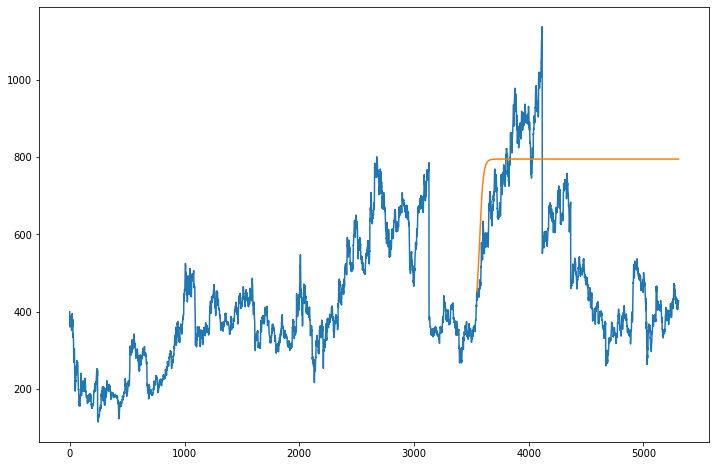

In [32]:
testPredictPlot = np.empty_like(df_VWAP)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (time_step*2) +1:, :] = outputnp

plt.figure(figsize=[12,8])
plt.plot(scaler.inverse_transform(df_VWAP))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()